<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/miky_generalYelpUsersSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sort = 'Random'

# file con i dati di tutti i ristoranti random
all_analysis = '1n9vdCnppJGdE6M6HdKYlksuTntQYHA7P'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': all_analysis})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

# leggo il csv con pandas
res = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

#res_agg = res.groupby(['restaurant','ethnicity']).count()[['user_id']]    #agg({'user_id':count})
#res_agg = res[res['restaurant'] == 'TupeloHoney'].groupby('ethnicity').count() 

In [30]:
import warnings
# Prendo i dati che mi servono di tutti i ristoranti

asian = res['ethnicity'] == 'asian'
mexican = res['ethnicity'] == 'hispanic, latino, or spanish origin'
black_american = res['ethnicity'] == 'black or african american'
white_american = res['ethnicity'] == 'white'
positive = res['review_sentiment'] == 'positive'
negative = res['review_sentiment'] == 'negative'
neutral = res['review_sentiment'] == 'neutral'
feminine = res['gender'] == 'feminine'
masculine = res['gender'] == 'masculine'
nc = res['zone'] == 'NC'  # North Carolina
az = res['zone'] == 'AZ'  # Arizona
nv = res['zone'] == 'NV'  # Nevada

# sopprimo il Future Warning
warnings.simplefilter(action='ignore', category=FutureWarning)

# converto le stringhe di age in int
res.age = pd.to_numeric(res.age, errors='coerce').fillna(0).astype(np.int64)

under40 = res['age'] < 40
over40 = res['age'] > 40


# ALL RESTAURANTS

# Percentuali di opinione di una ETNIA in generale su yelp, in base al numero effettivo di utenti della stessa etnia

# ETNIA

totAmericanUsers = len(res[(black_american) | (white_american)])
totAsianUsers = len(res[(asian)])
totMexicanUsers = len(res[(mexican)])

# POSITIVI
# numero medio di utenti asiatici, messicani e americani sul totale
american_positive = ((len(res[((black_american) & (positive)) | ((white_american) & (positive))])) * 100) / totAmericanUsers
asian_positive = (len(res[(asian) & (positive)]) * 100) / totAsianUsers
mexican_positive = (len(res[(mexican) & (positive)]) * 100) / totMexicanUsers

# NEGATIVI
# numero medio di utenti asiatici, messicani e americani sul totale
american_negative = ((len(res[((black_american) & (negative)) | ((white_american) & (negative))])) * 100) / totAmericanUsers
asian_negative = (len(res[(asian) & (negative)]) * 100) / totAsianUsers
mexican_negative = (len(res[(mexican) & (negative)]) * 100) / totMexicanUsers

# NEUTRI
# numero medio di utenti asiatici, messicani e americani sul totale
american_neutral = ((len(res[((black_american) & (neutral)) | ((white_american) & (neutral))])) * 100) / totAmericanUsers
asian_neutral = (len(res[(asian) & (neutral)]) * 100) / totAsianUsers
mexican_neutral = (len(res[(mexican) & (neutral)]) * 100) / totMexicanUsers



# GENERE
# Percentuali di opinione di un GENERE in generale su yelp, in base al numero effettivo di utenti dello stesso genere

totWomenUsers = len(res[(feminine)])
totMenUsers = len(res[(masculine)])

# POSITIVI
# numero medio di utenti asiatici, messicani e americani sul totale
women_positive = ((len(res[((feminine) & (positive))])) * 100) / totWomenUsers
men_positive = (len(res[(masculine) & (positive)]) * 100) / totMenUsers

# NEGATIVI
# numero medio di utenti asiatici, messicani e americani sul totale
women_negative = ((len(res[(feminine) & (negative)])) * 100) / totWomenUsers
men_negative = (len(res[(masculine) & (negative)]) * 100) / totMenUsers

# NEUTRI
# numero medio di utenti asiatici, messicani e americani sul totale
women_neutral = ((len(res[(feminine) & (neutral)])) * 100) / totWomenUsers
men_neutral = (len(res[(masculine) & (neutral)]) * 100) / totMenUsers



# ETA'
# Percentuali di opinione per gruppi di età in generale su yelp, in base al numero effettivo di utenti della stessa stessa età

totUnder40Users = len(res[(under40)])
totOver40Users = len(res[(over40)])

# POSITIVI
# numero medio di utenti asiatici, messicani e americani sul totale
under40_positive = ((len(res[((under40) & (positive))])) * 100) / totUnder40Users
over40_positive = (len(res[(over40) & (positive)]) * 100) / totOver40Users

# NEGATIVI
# numero medio di utenti asiatici, messicani e americani sul totale
under40_negative = ((len(res[(under40) & (negative)])) * 100) / totUnder40Users
over40_negative = (len(res[(over40) & (negative)]) * 100) / totOver40Users

# NEUTRI
# numero medio di utenti asiatici, messicani e americani sul totale
under40_neutral = ((len(res[(under40) & (neutral)])) * 100) / totUnder40Users
over40_neutral = (len(res[(over40) & (neutral)]) * 100) / totOver40Users


# ZONA
# Percentuali di opinione per zona in generale su yelp, in base al numero effettivo di utenti della stessa stessa zona

totNorthCarolinaUsers = len(res[(nc)])
totArizonaUsers = len(res[(az)])
totNevadaUsers = len(res[(nv)])

# POSITIVI
# numero medio di utenti asiatici, messicani e americani sul totale
nc_positive = ((len(res[((nc) & (positive))])) * 100) / totNorthCarolinaUsers
az_positive = (len(res[(az) & (positive)]) * 100) / totArizonaUsers
nv_positive = (len(res[(nv) & (positive)]) * 100) / totNevadaUsers

# NEGATIVI
# numero medio di utenti asiatici, messicani e americani sul totale
nc_negative = ((len(res[(nc) & (negative)])) * 100) / totNorthCarolinaUsers
az_negative = (len(res[(az) & (negative)]) * 100) / totArizonaUsers
nv_negative = (len(res[(nv) & (negative)]) * 100) / totNevadaUsers

# NEUTRI
# numero medio di utenti asiatici, messicani e americani sul totale
nc_neutral = ((len(res[(nc) & (neutral)])) * 100) / totNorthCarolinaUsers
az_neutral = (len(res[(az) & (neutral)]) * 100) / totArizonaUsers
nv_neutral = (len(res[(nv) & (neutral)]) * 100) / totNevadaUsers


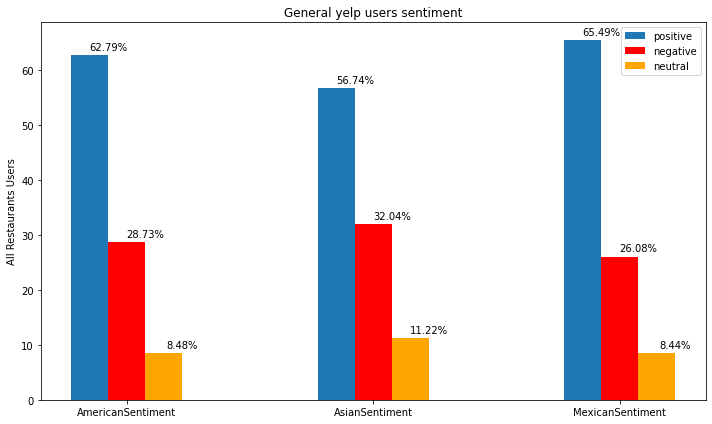

In [28]:
# Costruisco il grafico

labels = ['AmericanSentiment', 'AsianSentiment', 'MexicanSentiment']

# GRAFICO PER TUTTI GLI UTENTI PER ETNIA

# valori barre
positive = [american_positive, asian_positive, mexican_positive]
negative = [american_negative, asian_negative, mexican_negative]
neutral = [american_neutral, asian_neutral, mexican_neutral]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, positive, width, label='positive')
rects2 = ax.bar(x, negative, width, label='negative', color='red')
rects3 = ax.bar(x + width, neutral, width, label='neutral', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('All Restaurants Users')
ax.set_title('General yelp users sentiment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

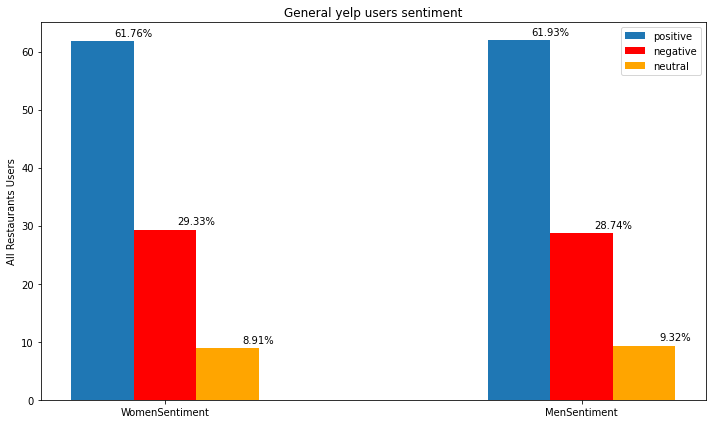

In [27]:
# Costruisco il grafico

labels = ['WomenSentiment', 'MenSentiment']

# GRAFICO PER TUTTI GLI UTENTI PER GENERE

# valori barre
positive = [women_positive, men_positive]
negative = [women_negative, men_negative]
neutral = [women_neutral, men_neutral]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, positive, width, label='positive')
rects2 = ax.bar(x, negative, width, label='negative', color='red')
rects3 = ax.bar(x + width, neutral, width, label='neutral', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('All Restaurants Users')
ax.set_title('General yelp users sentiment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

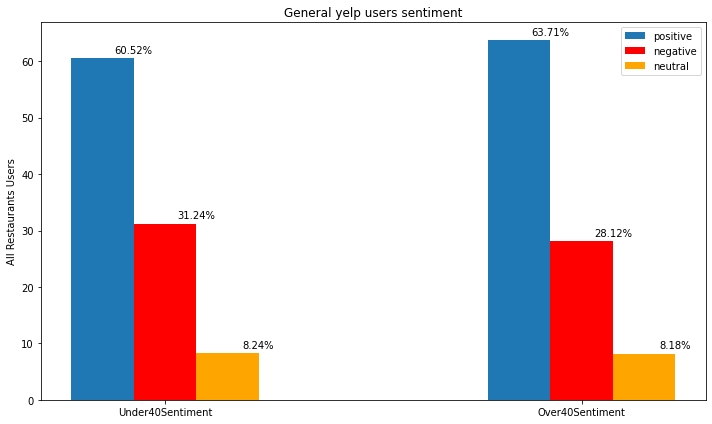

In [26]:
# Costruisco il grafico

labels = ['Under40Sentiment', 'Over40Sentiment']

# GRAFICO PER TUTTI GLI UTENTI PER ETA'

# valori barre
positive = [under40_positive, over40_positive]
negative = [under40_negative, over40_negative]
neutral = [under40_neutral, over40_neutral]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, positive, width, label='positive')
rects2 = ax.bar(x, negative, width, label='negative', color='red')
rects3 = ax.bar(x + width, neutral, width, label='neutral', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('All Restaurants Users')
ax.set_title('General yelp users sentiment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

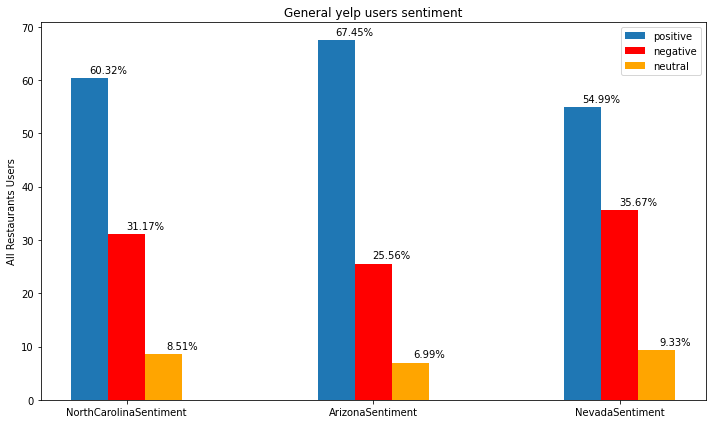

In [31]:
# Costruisco il grafico

labels = ['NorthCarolinaSentiment', 'ArizonaSentiment', 'NevadaSentiment']

# GRAFICO PER TUTTI GLI UTENTI PER ZONA

# valori barre
positive = [nc_positive, az_positive, nv_positive]
negative = [nc_negative, az_negative, nv_negative]
neutral = [nc_neutral, az_neutral, nv_neutral]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, positive, width, label='positive')
rects2 = ax.bar(x, negative, width, label='negative', color='red')
rects3 = ax.bar(x + width, neutral, width, label='neutral', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('All Restaurants Users')
ax.set_title('General yelp users sentiment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()